In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
from scipy.stats import pearsonr, f_oneway
from statsmodels.tsa.arima.model import ARIMA
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from regressors import stats

In [2]:
county = "Dallas"
state = "Texas"
state_abb = "TX"
FIPS = "48113"

# A4

# Read the csv files

Read the csv files.  
Convert the FIPS column to Strings with 0 in front if it's not 5 digits long.

US Confirmed Case Count  
COVID-19 data from John Hopkins University

In [3]:
# Helper function to convert FIPS into a string
def convert_to_zip_code(value):
    if np.isnan(value):
        return ""
    else:
        return str(int(value)).zfill(5)

us_confirmed_cases = pd.read_csv("../data/RAW_us_confirmed_cases.csv")
# Convert FIPS into a String Zip
us_confirmed_cases['FIPS'] = us_confirmed_cases['FIPS'].apply(convert_to_zip_code)
us_confirmed_cases

,Province_State,Admin2,UID,iso2,iso3,code3,FIPS,Country_Region,Lat,Long_,...,10/17/21,10/18/21,10/19/21,10/20/21,10/21/21,10/22/21,10/23/21,10/24/21,10/25/21,10/26/21
0,Alabama,Autauga,84001001,US,USA,840,01001,US,32.539527,-86.644082,...,9901,9904,9909,9910,9954,9967,10043,10047,10048,10061
1,Alabama,Baldwin,84001003,US,USA,840,01003,US,30.727750,-87.722071,...,37087,37098,37127,37167,37192,37224,37245,37258,37266,37285
2,Alabama,Barbour,84001005,US,USA,840,01005,US,31.868263,-85.387129,...,3556,3560,3563,3565,3566,3575,3577,3578,3578,3583
3,Alabama,Bibb,84001007,US,USA,840,01007,US,32.996421,-87.125115,...,4217,4217,4232,4236,4240,4246,4251,4252,4253,4256
4,Alabama,Blount,84001009,US,USA,840,01009,US,33.982109,-86.567906,...,10102,10104,10113,10132,10162,10179,10192,10197,10207,10227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3337,Wyoming,Teton,84056039,US,USA,840,56039,US,43.935225,-110.589080,...,5050,5075,5083,5098,5110,5119,5119,5119,5152,5164
3338,Wyoming,Uinta,84056041,US,USA,840,56041,US,41.287818,-110.547578,...,3711,3719,3733,3744,3756,3781,3781,3781,3794,3805
3339,Wyoming,Unassigned,84090056,US,USA,840,90056,US,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
3340,Wyoming,Washakie,84056043,US,USA,840,56043,US,43.904516,-107.680187,...,1586,1603,1631,1645,1657,1677,1677,1677,1690,1700


Mask Mandates data from CDC  
U.S. State and Territorial Public Mask Mandates From April 10, 2020 through August 15, 2021 by County by Day

In [4]:
mask_mandates = pd.read_csv("../data/U.S._State_and_Territorial_Public_Mask_Mandates_From_April_10__2020_through_August_15__2021_by_County_by_Day.csv")
mask_mandates

,State_Tribe_Territory,County_Name,FIPS_State,FIPS_County,date,order_code,Face_Masks_Required_in_Public,Source_of_Action,URL,Citation
0,TX,Anderson County,48,1,4/10/2020,2,NaN,NaN,NaN,NaN
1,TX,Anderson County,48,1,4/11/2020,2,NaN,NaN,NaN,NaN
2,TX,Anderson County,48,1,4/12/2020,2,NaN,NaN,NaN,NaN
3,TX,Anderson County,48,1,4/13/2020,2,NaN,NaN,NaN,NaN
4,TX,Anderson County,48,1,4/14/2020,2,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
125217,TX,Zavala County,48,507,8/11/2021,2,No,Official,NaN,"Tex. Exec. Order No. GA-36 (May 18, 2021)"
125218,TX,Zavala County,48,507,8/12/2021,2,No,Official,NaN,"Tex. Exec. Order No. GA-36 (May 18, 2021)"
125219,TX,Zavala County,48,507,8/13/2021,2,No,Official,NaN,"Tex. Exec. Order No. GA-36 (May 18, 2021)"
125220,TX,Zavala County,48,507,8/14/2021,2,No,Official,NaN,"Tex. Exec. Order No. GA-36 (May 18, 2021)"


Mask use survey from NY Times.  
Survey taken July 2 to July 14 of 2020.

In [5]:
mask_use = pd.read_csv("../data/mask-use-by-county.csv")
# Convert the COUNTYFP into a string and add 0 in front if not 5 digits
mask_use['COUNTYFP'] = mask_use['COUNTYFP'].astype(str).str.zfill(5)
mask_use

,COUNTYFP,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS
0,01001,0.053,0.074,0.134,0.295,0.444
1,01003,0.083,0.059,0.098,0.323,0.436
2,01005,0.067,0.121,0.120,0.201,0.491
3,01007,0.020,0.034,0.096,0.278,0.572
4,01009,0.053,0.114,0.180,0.194,0.459
...,...,...,...,...,...,...
3137,56037,0.061,0.295,0.230,0.146,0.268
3138,56039,0.095,0.157,0.160,0.247,0.340
3139,56041,0.098,0.278,0.154,0.207,0.264
3140,56043,0.204,0.155,0.069,0.285,0.287


# Filter the DataFrames to the specific state and county

In [6]:
us_confirmed_cases_dallas = us_confirmed_cases[(us_confirmed_cases['Admin2'] == 'Dallas') & (us_confirmed_cases['Province_State'] == 'Texas')].reset_index(drop=True)
us_confirmed_cases_dallas

,Province_State,Admin2,UID,iso2,iso3,code3,FIPS,Country_Region,Lat,Long_,...,10/17/21,10/18/21,10/19/21,10/20/21,10/21/21,10/22/21,10/23/21,10/24/21,10/25/21,10/26/21
0,Texas,Dallas,84048113,US,USA,840,48113,US,32.766706,-96.777961,...,398928,399401,400449,401005,401467,402023,402023,402023,402626,403180


In [7]:
mask_mandates_dallas = mask_mandates[mask_mandates['County_Name'] == 'Dallas County'].reset_index(drop=True)
mask_mandates_dallas.head()

,State_Tribe_Territory,County_Name,FIPS_State,FIPS_County,date,order_code,Face_Masks_Required_in_Public,Source_of_Action,URL,Citation
0,TX,Dallas County,48,113,5/7/2020,2,NaN,NaN,NaN,NaN
1,TX,Dallas County,48,113,5/8/2020,2,NaN,NaN,NaN,NaN
2,TX,Dallas County,48,113,5/9/2020,2,NaN,NaN,NaN,NaN
3,TX,Dallas County,48,113,5/10/2020,2,NaN,NaN,NaN,NaN
4,TX,Dallas County,48,113,5/11/2020,2,NaN,NaN,NaN,NaN


In [8]:
mask_use_dallas = mask_use[mask_use['COUNTYFP'] == FIPS].reset_index(drop=True)
mask_use_dallas.head()

,COUNTYFP,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS
0,48113,0.024,0.019,0.059,0.141,0.757


# Transform the confirmed cases by melt
Convert each date column into a single date column and a value column as the new confirmed cases from the date

In [9]:
id_vars = [
    'Province_State',
    'Admin2',
    'UID',
    'iso2',
    'iso3',
    'code3',
    'FIPS',
    'Country_Region',
    'Lat',
    'Long_',
    'Combined_Key'
]

us_confirmed_cases_dallas_melt = pd.melt(us_confirmed_cases_dallas, id_vars=id_vars, var_name="Date", value_name="Confirmed_Cases")
us_confirmed_cases_dallas_melt.head()

,Province_State,Admin2,UID,iso2,iso3,code3,FIPS,Country_Region,Lat,Long_,Combined_Key,Date,Confirmed_Cases
0,Texas,Dallas,84048113,US,USA,840,48113,US,32.766706,-96.777961,"Dallas, Texas, US",1/22/20,0
1,Texas,Dallas,84048113,US,USA,840,48113,US,32.766706,-96.777961,"Dallas, Texas, US",1/23/20,0
2,Texas,Dallas,84048113,US,USA,840,48113,US,32.766706,-96.777961,"Dallas, Texas, US",1/24/20,0
3,Texas,Dallas,84048113,US,USA,840,48113,US,32.766706,-96.777961,"Dallas, Texas, US",1/25/20,0
4,Texas,Dallas,84048113,US,USA,840,48113,US,32.766706,-96.777961,"Dallas, Texas, US",1/26/20,0


# Merge us confirmed cases dataframe and mask mandates

Convert the Date columns from Strings to datetime objects  

In [10]:
us_confirmed_cases_dallas_melt['Date'] = pd.to_datetime(us_confirmed_cases_dallas_melt['Date'])

In [11]:
mask_mandates_dallas['date'] = pd.to_datetime(mask_mandates_dallas['date'])

Merge the two dataframes on the date columns and drop redundant columns

In [12]:
dallas_case_and_mandates = us_confirmed_cases_dallas_melt.merge(mask_mandates_dallas, left_on='Date', right_on='date', how='outer')
dallas_case_and_mandates.drop(columns=['State_Tribe_Territory', 'County_Name', 'FIPS_State', 'FIPS_County', 'date'], inplace=True)
dallas_case_and_mandates.head()

,Province_State,Admin2,UID,iso2,iso3,code3,FIPS,Country_Region,Lat,Long_,Combined_Key,Date,Confirmed_Cases,order_code,Face_Masks_Required_in_Public,Source_of_Action,URL,Citation
0,Texas,Dallas,84048113,US,USA,840,48113,US,32.766706,-96.777961,"Dallas, Texas, US",2020-01-22,0,NaN,NaN,NaN,NaN,NaN
1,Texas,Dallas,84048113,US,USA,840,48113,US,32.766706,-96.777961,"Dallas, Texas, US",2020-01-23,0,NaN,NaN,NaN,NaN,NaN
2,Texas,Dallas,84048113,US,USA,840,48113,US,32.766706,-96.777961,"Dallas, Texas, US",2020-01-24,0,NaN,NaN,NaN,NaN,NaN
3,Texas,Dallas,84048113,US,USA,840,48113,US,32.766706,-96.777961,"Dallas, Texas, US",2020-01-25,0,NaN,NaN,NaN,NaN,NaN
4,Texas,Dallas,84048113,US,USA,840,48113,US,32.766706,-96.777961,"Dallas, Texas, US",2020-01-26,0,NaN,NaN,NaN,NaN,NaN


# Analysis

### Caveats
- I am assuming nan is no for the mask mandates in the cdc data set  
- The cdc mask mandates data set only goes up to August, 15 2021. Because there is no data, we will be assuming there are no more mask mandates after August 15, 2021, which may not be true.
- I noticed that the new case count is recorded after 2 day break weekly, which is typically Saturday and Sunday. This also results in a huge number spike on Monday to make up for the 0 counts of the previous two days.
- Mask wearing survey from NY Times was taken July 2 to July 14 of 2020.

The Mask Mandates has three values: nan, yes, no. After doing some reading of the cdc sources, I am going to assume nan means there are no mandates. Therefore I am going to convert nan values to no.

In [13]:
dallas_case_and_mandates['Face_Masks_Required_in_Public'].fillna("No", inplace=True)

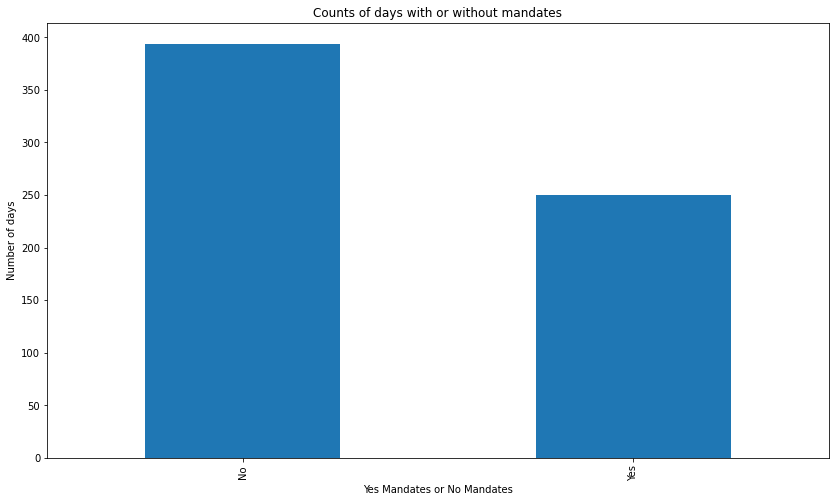

In [14]:
ax = dallas_case_and_mandates['Face_Masks_Required_in_Public'].value_counts(dropna=False).plot(kind='bar', figsize=(14,8))
ax.set_title("Counts of days with or without mandates")
ax.set_xlabel("Yes Mandates or No Mandates")
ax.set_ylabel("Number of days")

plt.show()

There seems to be more days of no mandates than days with mandates

#### Plot the confirmed cases as a time series

In [15]:
# fig, ax = plt.subplots(figsize=(14,8))
# sns.scatterplot(data=dallas_case_and_mandates, x='Date', y='Confirmed_Cases', hue='Face_Masks_Required_in_Public', ax=ax)
# ax.set_title("Covid Confirmed Cases by Date")
# ax.set_xlabel("Date")
# ax.set_ylabel("Covid Confirmed Cases")

# plt.show()

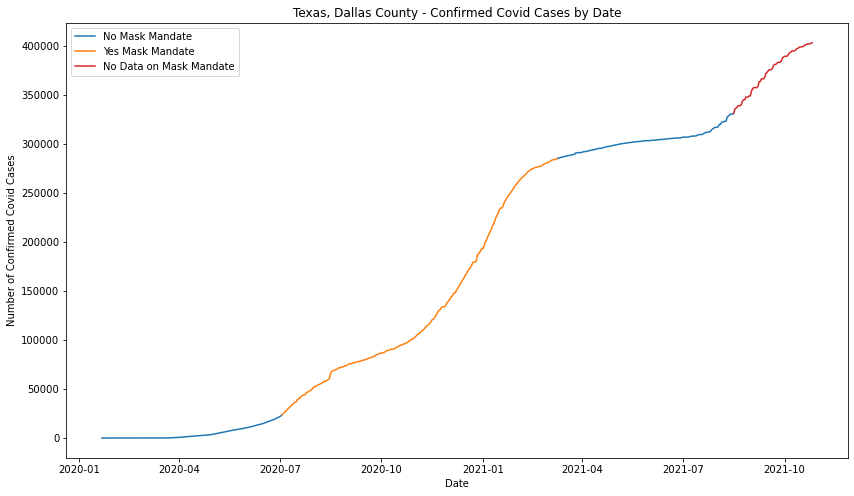

In [16]:
fig, ax = plt.subplots(figsize=(14,8))
ax.plot(dallas_case_and_mandates['Date'][:163+1], dallas_case_and_mandates['Confirmed_Cases'][:163+1], color='C0')
ax.plot(dallas_case_and_mandates['Date'][163:413+1], dallas_case_and_mandates['Confirmed_Cases'][163:413+1], color='C1')
ax.plot(dallas_case_and_mandates['Date'][413:572+1], dallas_case_and_mandates['Confirmed_Cases'][413:572+1], color='C0')
ax.plot(dallas_case_and_mandates['Date'][572:], dallas_case_and_mandates['Confirmed_Cases'][572:], color='C3')
line0 = Line2D([0], [0], label='No Mask Mandate', color='C0')
line1 = Line2D([0], [0], label='Yes Mask Mandate', color='C1')
line2 = Line2D([0], [0], label='No Data on Mask Mandate', color='C3')
plt.legend(handles=[line0,line1,line2])
ax.set_title("Texas, Dallas County - Confirmed Covid Cases by Date")
ax.set_xlabel("Date")
ax.set_ylabel("Number of Confirmed Covid Cases")

plt.show()

It seems like there is a mask mandate in the worst part of the covid period.  
#### I'm going to use daily increase instead of total case count instead.  
First I need to get the daily covid case value

In [17]:
dallas_case_and_mandates['New_Cases'] = dallas_case_and_mandates['Confirmed_Cases'].diff()
dallas_case_and_mandates.head()

,Province_State,Admin2,UID,iso2,iso3,code3,FIPS,Country_Region,Lat,Long_,Combined_Key,Date,Confirmed_Cases,order_code,Face_Masks_Required_in_Public,Source_of_Action,URL,Citation,New_Cases
0,Texas,Dallas,84048113,US,USA,840,48113,US,32.766706,-96.777961,"Dallas, Texas, US",2020-01-22,0,NaN,No,NaN,NaN,NaN,NaN
1,Texas,Dallas,84048113,US,USA,840,48113,US,32.766706,-96.777961,"Dallas, Texas, US",2020-01-23,0,NaN,No,NaN,NaN,NaN,0.0
2,Texas,Dallas,84048113,US,USA,840,48113,US,32.766706,-96.777961,"Dallas, Texas, US",2020-01-24,0,NaN,No,NaN,NaN,NaN,0.0
3,Texas,Dallas,84048113,US,USA,840,48113,US,32.766706,-96.777961,"Dallas, Texas, US",2020-01-25,0,NaN,No,NaN,NaN,NaN,0.0
4,Texas,Dallas,84048113,US,USA,840,48113,US,32.766706,-96.777961,"Dallas, Texas, US",2020-01-26,0,NaN,No,NaN,NaN,NaN,0.0


In [18]:
# fig, ax = plt.subplots(figsize=(14,8))
# sns.scatterplot(data=dallas_case_and_mandates, x='Date', y='New_Cases', hue='Face_Masks_Required_in_Public', ax=ax)
# ax.set_title("Covid Confirmed Cases by Date")
# ax.set_xlabel("Date")
# ax.set_ylabel("Covid Confirmed Cases")

# plt.show()

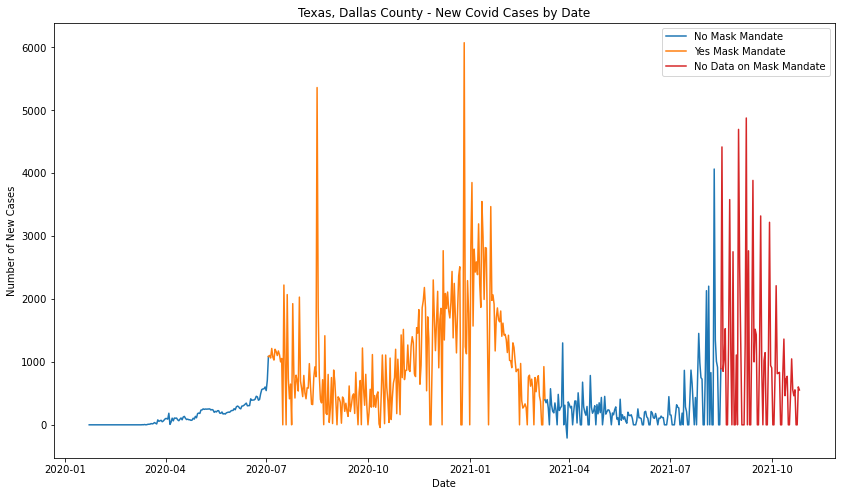

In [19]:
fig, ax = plt.subplots(figsize=(14,8))
ax.plot(dallas_case_and_mandates['Date'][:163+1], dallas_case_and_mandates['New_Cases'][:163+1], color='C0')
ax.plot(dallas_case_and_mandates['Date'][163:413+1], dallas_case_and_mandates['New_Cases'][163:413+1], color='C1')
ax.plot(dallas_case_and_mandates['Date'][413:572+1], dallas_case_and_mandates['New_Cases'][413:572+1], color='C0')
ax.plot(dallas_case_and_mandates['Date'][572:], dallas_case_and_mandates['New_Cases'][572:], color='C3')
line0 = Line2D([0], [0], label='No Mask Mandate', color='C0')
line1 = Line2D([0], [0], label='Yes Mask Mandate', color='C1')
line2 = Line2D([0], [0], label='No Data on Mask Mandate', color='C3')
plt.legend(handles=[line0,line1,line2])
ax.set_title("Texas, Dallas County - New Covid Cases by Date")
ax.set_xlabel("Date")
ax.set_ylabel("Number of New Cases")

plt.show()

After plotting this plot, I noticed there were a lot of 0 new cases and I decided to investigate further. After inspection, I noticed that the new case count is recorded after 2 day break, which is typically Saturday and Sunday. This also results in a huge number spike on Monday to make up for the 0 counts of the previous two days.

#### Analyze the covid case counts by day of week  
Extract day of week from the Date column

In [20]:
dallas_case_and_mandates['Day_Of_Week'] = dallas_case_and_mandates['Date'].dt.day_name()
dallas_case_and_mandates.head()

,Province_State,Admin2,UID,iso2,iso3,code3,FIPS,Country_Region,Lat,Long_,Combined_Key,Date,Confirmed_Cases,order_code,Face_Masks_Required_in_Public,Source_of_Action,URL,Citation,New_Cases,Day_Of_Week
0,Texas,Dallas,84048113,US,USA,840,48113,US,32.766706,-96.777961,"Dallas, Texas, US",2020-01-22,0,NaN,No,NaN,NaN,NaN,NaN,Wednesday
1,Texas,Dallas,84048113,US,USA,840,48113,US,32.766706,-96.777961,"Dallas, Texas, US",2020-01-23,0,NaN,No,NaN,NaN,NaN,0.0,Thursday
2,Texas,Dallas,84048113,US,USA,840,48113,US,32.766706,-96.777961,"Dallas, Texas, US",2020-01-24,0,NaN,No,NaN,NaN,NaN,0.0,Friday
3,Texas,Dallas,84048113,US,USA,840,48113,US,32.766706,-96.777961,"Dallas, Texas, US",2020-01-25,0,NaN,No,NaN,NaN,NaN,0.0,Saturday
4,Texas,Dallas,84048113,US,USA,840,48113,US,32.766706,-96.777961,"Dallas, Texas, US",2020-01-26,0,NaN,No,NaN,NaN,NaN,0.0,Sunday


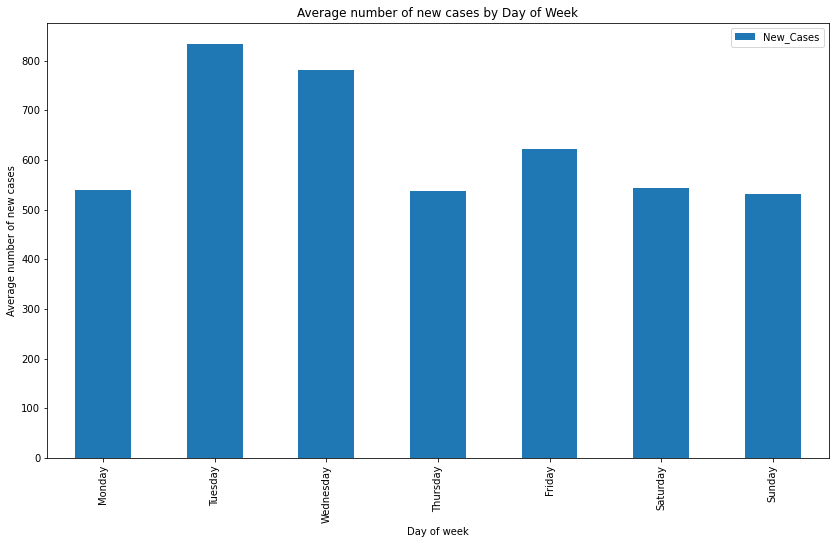

In [21]:
ax = dallas_case_and_mandates.groupby('Day_Of_Week').agg({'New_Cases':'mean'}).reindex([ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).plot(kind='bar', figsize=(14,8))
ax.set_title("Average number of new cases by Day of Week")
ax.set_xlabel("Day of week")
ax.set_ylabel("Average number of new cases")

plt.show()

It is quite often found that Saturday, Sunday, and Monday do are the days with breaks (values with 0). Then the days that have a spike value due to the previous missing values are usually Monday and Tuesday. Due to Monday also have missing values, the average is roughly the same as Saturday and Sunday. The average for Tuesday is significantly higher and that is due to spike values from the previous empty two days and also because Tuesday is not a day that has been taken off before.

#### It is likely new confirmed cases have a delay. Currently my plot has no delay. I will now try the same line plot with a 7 days delay.

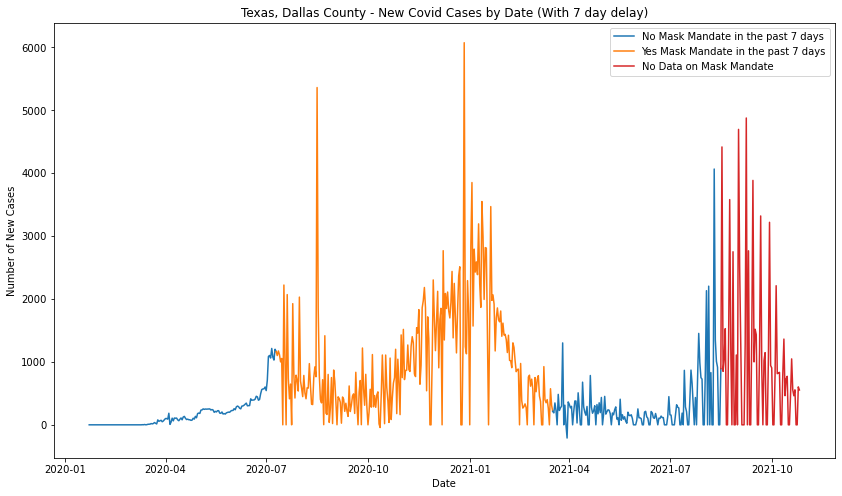

In [22]:
delay = 7

fig, ax = plt.subplots(figsize=(14,8))
ax.plot(dallas_case_and_mandates['Date'][:163+delay+1], dallas_case_and_mandates['New_Cases'][:163+delay+1], color='C0')
ax.plot(dallas_case_and_mandates['Date'][163+delay:413+delay+1], dallas_case_and_mandates['New_Cases'][163+delay:413+delay+1], color='C1')
ax.plot(dallas_case_and_mandates['Date'][413+delay:572+1], dallas_case_and_mandates['New_Cases'][413+delay:572+1], color='C0')
ax.plot(dallas_case_and_mandates['Date'][572:], dallas_case_and_mandates['New_Cases'][572:], color='C3')
line0 = Line2D([0], [0], label='No Mask Mandate in the past '+str(delay)+' days', color='C0')
line1 = Line2D([0], [0], label='Yes Mask Mandate in the past '+str(delay)+' days', color='C1')
line2 = Line2D([0], [0], label='No Data on Mask Mandate', color='C3')
plt.legend(handles=[line0,line1,line2])
ax.set_title("Texas, Dallas County - New Covid Cases by Date (With 7 day delay)")
ax.set_xlabel("Date")
ax.set_ylabel("Number of New Cases")

plt.show()

With the 1 week delay on the plot, the plot looks very similar to as the previous plot. It's a small shift. It looks like the mask mandate was in the worst part of Covid and there were high number of daily new cases. Perhaps, it would be worse without the mask mandate. We do see a spike in covid cases right before the mask mandate though, and that's why the mask mandate was probably put into place. It does look like soon after the mask mandate, there is a slight drop in covid cases before it spikes up really high around December 2020 and Janurary 2021. However, the spike drops very soon. I imagine that drop is due to the mass population receiving vaccinations around that time period. I choose not to comment on the dates after August 2021, as the mask mandates data set does not reach this far, and I'm not sure if there is a mask mandate there or not.

#### Plot with a 7 day moving average

In [23]:
dallas_case_and_mandates['Moving_Average_New_Cases'] = dallas_case_and_mandates['New_Cases'].rolling(window=7).mean()
dallas_case_and_mandates.head()

,Province_State,Admin2,UID,iso2,iso3,code3,FIPS,Country_Region,Lat,Long_,...,Date,Confirmed_Cases,order_code,Face_Masks_Required_in_Public,Source_of_Action,URL,Citation,New_Cases,Day_Of_Week,Moving_Average_New_Cases
0,Texas,Dallas,84048113,US,USA,840,48113,US,32.766706,-96.777961,...,2020-01-22,0,NaN,No,NaN,NaN,NaN,NaN,Wednesday,NaN
1,Texas,Dallas,84048113,US,USA,840,48113,US,32.766706,-96.777961,...,2020-01-23,0,NaN,No,NaN,NaN,NaN,0.0,Thursday,NaN
2,Texas,Dallas,84048113,US,USA,840,48113,US,32.766706,-96.777961,...,2020-01-24,0,NaN,No,NaN,NaN,NaN,0.0,Friday,NaN
3,Texas,Dallas,84048113,US,USA,840,48113,US,32.766706,-96.777961,...,2020-01-25,0,NaN,No,NaN,NaN,NaN,0.0,Saturday,NaN
4,Texas,Dallas,84048113,US,USA,840,48113,US,32.766706,-96.777961,...,2020-01-26,0,NaN,No,NaN,NaN,NaN,0.0,Sunday,NaN


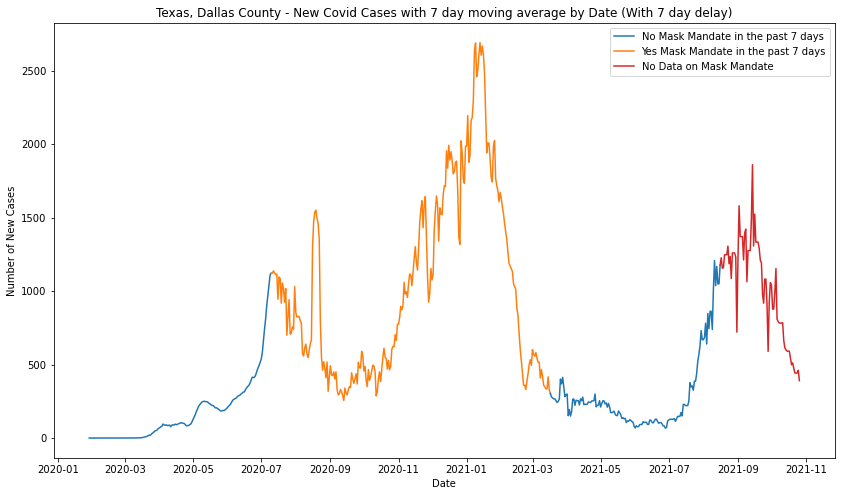

In [24]:
delay = 7

fig, ax = plt.subplots(figsize=(14,8))
ax.plot(dallas_case_and_mandates['Date'][:163+delay+1], dallas_case_and_mandates['Moving_Average_New_Cases'][:163+delay+1], color='C0')
ax.plot(dallas_case_and_mandates['Date'][163+delay:413+delay+1], dallas_case_and_mandates['Moving_Average_New_Cases'][163+delay:413+delay+1], color='C1')
ax.plot(dallas_case_and_mandates['Date'][413+delay:572+1], dallas_case_and_mandates['Moving_Average_New_Cases'][413+delay:572+1], color='C0')
ax.plot(dallas_case_and_mandates['Date'][572:], dallas_case_and_mandates['Moving_Average_New_Cases'][572:], color='C3')
line0 = Line2D([0], [0], label='No Mask Mandate in the past '+str(delay)+' days', color='C0')
line1 = Line2D([0], [0], label='Yes Mask Mandate in the past '+str(delay)+' days', color='C1')
line2 = Line2D([0], [0], label='No Data on Mask Mandate', color='C3')
plt.legend(handles=[line0,line1,line2])
ax.set_title("Texas, Dallas County - New Covid Cases with 7 day moving average by Date (With 7 day delay)")
ax.set_xlabel("Date")
ax.set_ylabel("Number of New Cases")

plt.show()

#### Plot confirmed cases around $\pm2$ weeks around July 2 to July 14 of 2020 (around the New York Times survey).

In [25]:
dallas_case_and_mandates_july = dallas_case_and_mandates[(dallas_case_and_mandates['Date'] >= '2020-06-18') & (dallas_case_and_mandates['Date'] <= '2020-07-28')]
dallas_case_and_mandates_july.head()

,Province_State,Admin2,UID,iso2,iso3,code3,FIPS,Country_Region,Lat,Long_,...,Date,Confirmed_Cases,order_code,Face_Masks_Required_in_Public,Source_of_Action,URL,Citation,New_Cases,Day_Of_Week,Moving_Average_New_Cases
148,Texas,Dallas,84048113,US,USA,840,48113,US,32.766706,-96.777961,...,2020-06-18,15648,2.0,No,NaN,NaN,NaN,392.0,Thursday,341.571429
149,Texas,Dallas,84048113,US,USA,840,48113,US,32.766706,-96.777961,...,2020-06-19,16042,2.0,No,NaN,NaN,NaN,394.0,Friday,351.000000
150,Texas,Dallas,84048113,US,USA,840,48113,US,32.766706,-96.777961,...,2020-06-20,16437,2.0,No,NaN,NaN,NaN,395.0,Saturday,358.142857
151,Texas,Dallas,84048113,US,USA,840,48113,US,32.766706,-96.777961,...,2020-06-21,16845,2.0,No,NaN,NaN,NaN,408.0,Sunday,373.285714
152,Texas,Dallas,84048113,US,USA,840,48113,US,32.766706,-96.777961,...,2020-06-22,17299,2.0,No,NaN,NaN,NaN,454.0,Monday,394.571429


In [26]:
mask_use_dallas.head()

,COUNTYFP,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS
0,48113,0.024,0.019,0.059,0.141,0.757


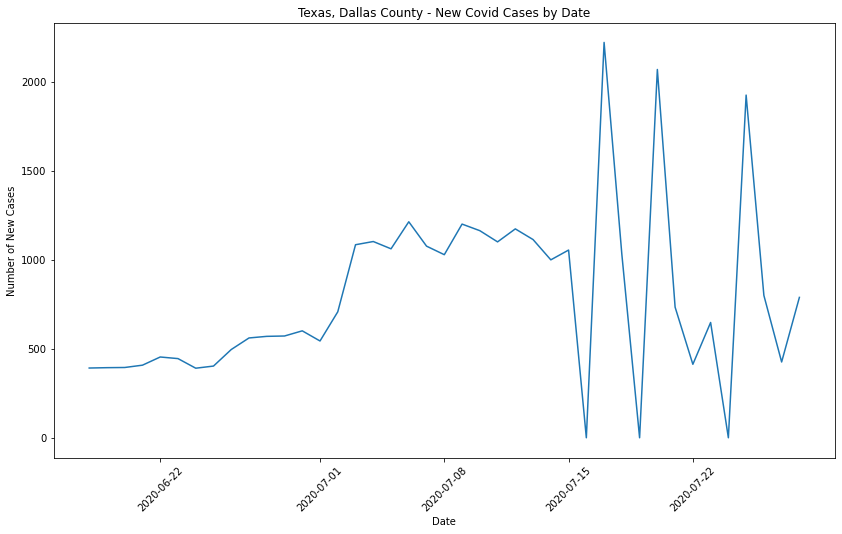

In [27]:
fig, ax = plt.subplots(figsize=(14,8))
ax.plot(dallas_case_and_mandates_july['Date'], dallas_case_and_mandates_july['New_Cases'])
ax.xaxis.set_tick_params(rotation=45)
ax.set_title("Texas, Dallas County - New Covid Cases by Date")
ax.set_xlabel("Date")
ax.set_ylabel("Number of New Cases")

plt.show()

There seems to be a lot of jumping around near the end of July. The seems to be due to having no reports on one day, and then a makeup day with almost twice the value.  
75% answered Always wear mask
14% answered Frequently wear mask  
75% + 14% = 89% wear masks frequently or more  
Considering that 89% wore masks around the July time period, the covid cases were around 1000 a day. Looking at this plot, it's very hard to say if there was any impact of masks and new covid cases.

# A6

##### Read the unemployment data

In [28]:
df_unemployment = pd.read_excel("../data/unemployment_rate.xls", skiprows=10)
df_unemployment.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,2011,8.3,8.0,7.9,7.6,7.8,8.5,8.4,8.1,7.9,7.4,7.0,6.8
1,2012,7.1,7.0,6.6,6.2,6.5,7.1,7.1,6.7,6.2,6.1,5.9,6.0
2,2013,6.9,6.5,6.3,5.9,6.1,6.7,6.5,6.2,6.1,5.9,5.6,5.3
3,2014,5.7,5.7,5.5,4.8,5.1,5.4,5.5,5.4,5.0,4.6,4.5,4.1
4,2015,4.6,4.3,4.2,3.8,4.0,4.3,4.3,4.1,4.0,3.9,3.9,3.6


Melt the month column. Convert the month to an integer.

In [29]:
df_unemployment = pd.melt(df_unemployment, id_vars=['Year'], value_vars=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], var_name='Month', value_name="unemployment_rate")

d = {'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4, 'May':5, 'Jun':6, 'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12}
df_unemployment.Month = df_unemployment.Month.map(d)

df_unemployment['Date'] = pd.to_datetime(df_unemployment['Year'].astype(str) + df_unemployment['Month'].astype(str).str.zfill(2), format='%Y%m')
df_unemployment.sort_values(by=['Date'], inplace=True)

df_unemployment

,Year,Month,unemployment_rate,Date
0,2011,1,8.3,2011-01-01
11,2011,2,8.0,2011-02-01
22,2011,3,7.9,2011-03-01
33,2011,4,7.6,2011-04-01
44,2011,5,7.8,2011-05-01
...,...,...,...,...
87,2021,8,4.7,2021-08-01
98,2021,9,4.4,2021-09-01
109,2021,10,NaN,2021-10-01
120,2021,11,NaN,2021-11-01


##### Read the uninsured data

In [30]:
df_uninsured = pd.read_csv("../data/uninsured_rate.csv")
df_uninsured['year'] = pd.to_datetime(df_uninsured['year'], format='%Y')
df_uninsured

,year,uninsured_rate
0,2010-01-01,23.7
1,2011-01-01,23.0
2,2012-01-01,22.5
3,2013-01-01,22.1
4,2014-01-01,19.1
5,2015-01-01,17.1
6,2016-01-01,16.6
7,2017-01-01,17.3
8,2018-01-01,17.7
9,2019-01-01,18.4


### Exploratory Data Analysis and Visualizations

Plot unemployment rate by itself as a time series

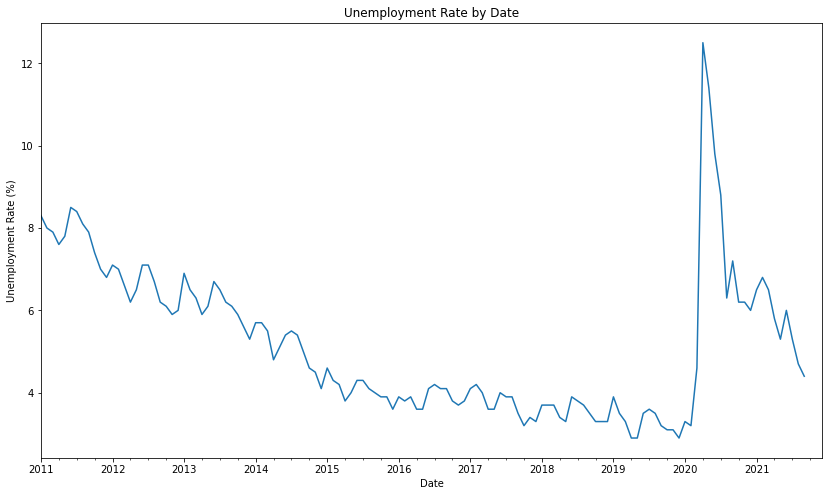

In [31]:
fig, ax = plt.subplots(figsize=(14,8))
df_unemployment.plot(x='Date', y='unemployment_rate', ax=ax)
ax.get_legend().remove()
ax.set_title('Unemployment Rate by Date')
ax.set_ylabel('Unemployment Rate (%)')
ax.set_xlabel('Date')
plt.show()

Plot uninsured health insurance rates by itself as a time series

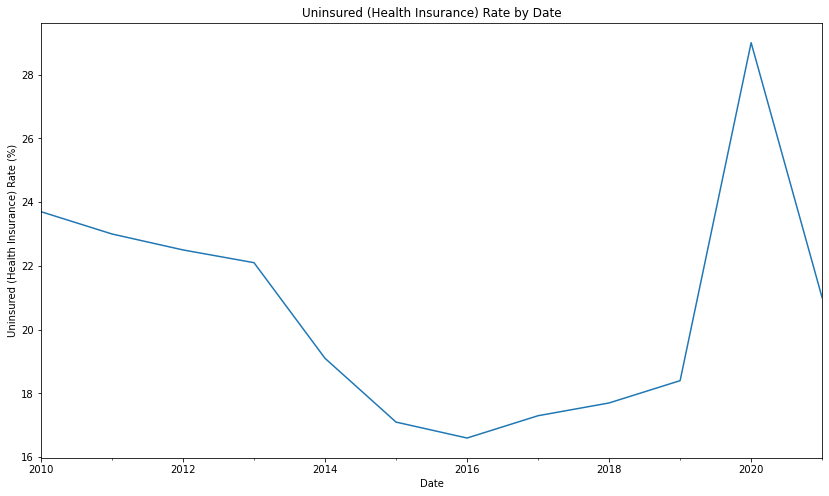

In [32]:
fig, ax = plt.subplots(figsize=(14,8))
df_uninsured.plot(x="year", ax=ax)
ax.get_legend().remove()
ax.set_title('Uninsured (Health Insurance) Rate by Date')
ax.set_ylabel('Uninsured (Health Insurance) Rate (%)')
ax.set_xlabel('Date')
plt.show()

Plot uninsured and unemployment together in a time series

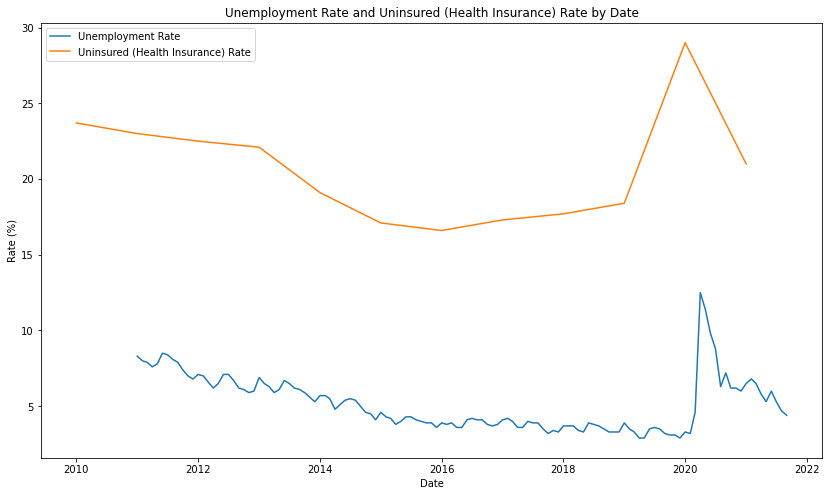

In [33]:
fig, ax = plt.subplots(figsize=(14,8))
ax.plot(df_unemployment['Date'], df_unemployment['unemployment_rate'])
ax.plot(df_uninsured['year'], df_uninsured['uninsured_rate'])
line0 = Line2D([0], [0], label='Unemployment Rate', color='C0')
line1 = Line2D([0], [0], label='Uninsured (Health Insurance) Rate', color='C1')
plt.legend(handles=[line0,line1])
ax.set_title('Unemployment Rate and Uninsured (Health Insurance) Rate by Date')
ax.set_ylabel('Rate (%)')
ax.set_xlabel('Date')
plt.show()

The uninsured rate spikes as the unemployment rate spikes. These two variables are highly correlated. Most people have insurance through their employment.

Plot uninsured rate along with the covid and mask data

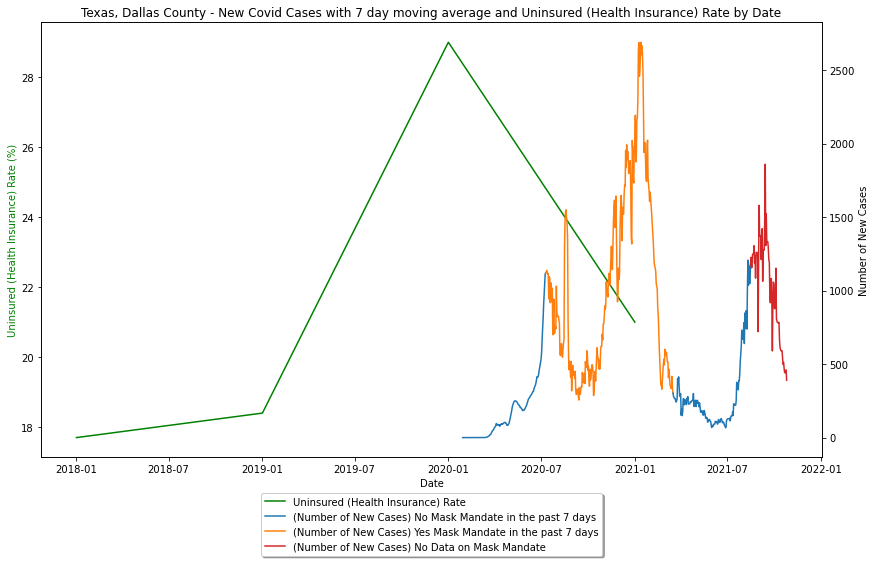

In [56]:
delay = 7

fig, ax = plt.subplots(figsize=(14,8))
ax.plot(df_uninsured[df_uninsured['year'] >= '2018-01-01']['year'], df_uninsured[df_uninsured['year'] >= '2018-01-01']['uninsured_rate'], color='g')
ax.set_ylabel("Uninsured (Health Insurance) Rate (%)", color='g')
ax.set_xlabel("Date")
#df_unemployment.plot(x='Date', y='unemployment_rate', ax=ax)

ax2 = ax.twinx()
ax2.plot(dallas_case_and_mandates['Date'][:163+delay+1], dallas_case_and_mandates['Moving_Average_New_Cases'][:163+delay+1], color='C0')
ax2.plot(dallas_case_and_mandates['Date'][163+delay:413+delay+1], dallas_case_and_mandates['Moving_Average_New_Cases'][163+delay:413+delay+1], color='C1')
ax2.plot(dallas_case_and_mandates['Date'][413+delay:572+1], dallas_case_and_mandates['Moving_Average_New_Cases'][413+delay:572+1], color='C0')
ax2.plot(dallas_case_and_mandates['Date'][572:], dallas_case_and_mandates['Moving_Average_New_Cases'][572:], color='C3')


line00 = Line2D([0], [0], label='Uninsured (Health Insurance) Rate', color='g')
line0 = Line2D([0], [0], label='(Number of New Cases) No Mask Mandate in the past '+str(delay)+' days', color='C0')
line1 = Line2D([0], [0], label='(Number of New Cases) Yes Mask Mandate in the past '+str(delay)+' days', color='C1')
line2 = Line2D([0], [0], label='(Number of New Cases) No Data on Mask Mandate', color='C3')
plt.legend(handles=[line00,line0,line1,line2], loc='upper center', bbox_to_anchor=(0.5, -0.07),
          fancybox=True, shadow=True)
ax.set_title("Texas, Dallas County - New Covid Cases with 7 day moving average and Uninsured (Health Insurance) Rate by Date")
ax2.set_ylabel("Number of New Cases")


plt.show()

There are too little data points for uninsured health insurance rates.

Plot unemployment rate along with the covid and mask data

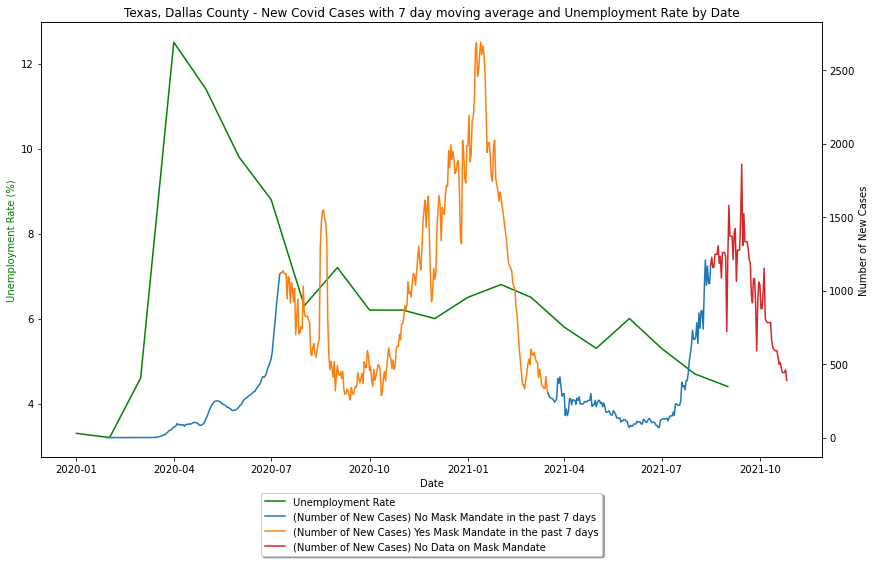

In [35]:
delay = 7

fig, ax = plt.subplots(figsize=(14,8))
ax.plot(df_unemployment[df_unemployment['Date'] >= '2020-01-01']['Date'], df_unemployment[df_unemployment['Date'] >= '2020-01-01']['unemployment_rate'], color='g')
ax.set_ylabel("Unemployment Rate (%)", color='g')

ax2 = ax.twinx()
ax2.plot(dallas_case_and_mandates['Date'][:163+delay+1], dallas_case_and_mandates['Moving_Average_New_Cases'][:163+delay+1], color='C0')
ax2.plot(dallas_case_and_mandates['Date'][163+delay:413+delay+1], dallas_case_and_mandates['Moving_Average_New_Cases'][163+delay:413+delay+1], color='C1')
ax2.plot(dallas_case_and_mandates['Date'][413+delay:572+1], dallas_case_and_mandates['Moving_Average_New_Cases'][413+delay:572+1], color='C0')
ax2.plot(dallas_case_and_mandates['Date'][572:], dallas_case_and_mandates['Moving_Average_New_Cases'][572:], color='C3')



line00 = Line2D([0], [0], label='Unemployment Rate', color='g')
line0 = Line2D([0], [0], label='(Number of New Cases) No Mask Mandate in the past '+str(delay)+' days', color='C0')
line1 = Line2D([0], [0], label='(Number of New Cases) Yes Mask Mandate in the past '+str(delay)+' days', color='C1')
line2 = Line2D([0], [0], label='(Number of New Cases) No Data on Mask Mandate', color='C3')
plt.legend(handles=[line00,line0,line1,line2], loc='upper center', bbox_to_anchor=(0.5, -0.07),
          fancybox=True, shadow=True)
ax.set_title("Texas, Dallas County - New Covid Cases with 7 day moving average and Unemployment Rate by Date")
ax2.set_ylabel("Number of New Cases")
ax.set_xlabel("Date")


plt.show()

There is the spike in unemployment at the start of the pandemic, and then it slowly and steadily decreases

##### Analyze unemployment by a time series model

In [36]:
df_ult = dallas_case_and_mandates.merge(df_unemployment)
df_ult.head()

,Province_State,Admin2,UID,iso2,iso3,code3,FIPS,Country_Region,Lat,Long_,...,Face_Masks_Required_in_Public,Source_of_Action,URL,Citation,New_Cases,Day_Of_Week,Moving_Average_New_Cases,Year,Month,unemployment_rate
0,Texas,Dallas,84048113,US,USA,840,48113,US,32.766706,-96.777961,...,No,NaN,NaN,NaN,0.0,Saturday,0.000000,2020,2,3.2
1,Texas,Dallas,84048113,US,USA,840,48113,US,32.766706,-96.777961,...,No,NaN,NaN,NaN,0.0,Sunday,0.000000,2020,3,4.6
2,Texas,Dallas,84048113,US,USA,840,48113,US,32.766706,-96.777961,...,No,NaN,NaN,NaN,100.0,Wednesday,69.142857,2020,4,12.5
3,Texas,Dallas,84048113,US,USA,840,48113,US,32.766706,-96.777961,...,No,NaN,NaN,NaN,187.0,Friday,126.285714,2020,5,11.4
4,Texas,Dallas,84048113,US,USA,840,48113,US,32.766706,-96.777961,...,No,NaN,NaN,NaN,228.0,Monday,209.142857,2020,6,9.8


In [37]:
y = np.array(df_ult['unemployment_rate'][:-1])
X = np.array(df_ult['Moving_Average_New_Cases'][:-1]).reshape(-1, 1)

reg = LinearRegression().fit(X, y)

stats.summary(reg, X, y, ['New_Cases'])

Residuals:
    Min      1Q  Median     3Q    Max
-5.5081 -0.7392  0.3505 1.6163 3.8356


Coefficients:
            Estimate  Std. Error  t value   p value
_intercept  7.035601    0.726765   9.6807  0.000000
New_Cases  -0.000632    0.000637  -0.9928  0.333299
---
R-squared:  0.02285,    Adjusted R-squared:  -0.03144
F-statistic: 0.42 on 1 features


The unemployment rate and new COVID-19 cases are not correlated. This is suprising!

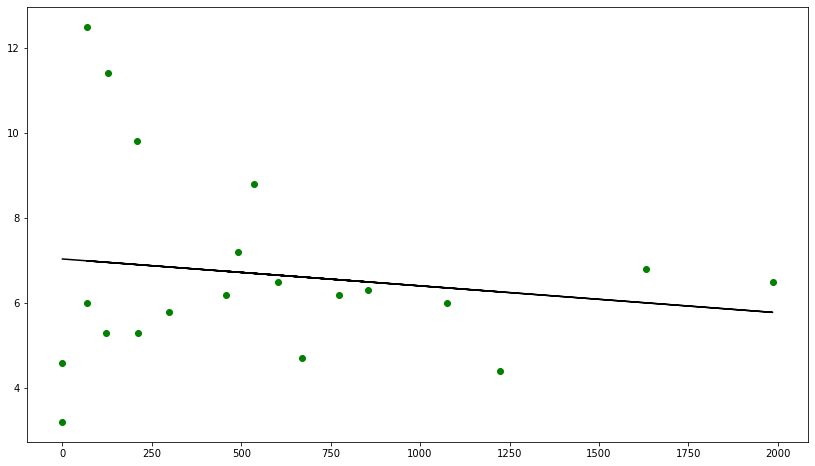

In [38]:
fig, ax = plt.subplots(figsize=(14,8))
ax.scatter(X, y,color='g')
ax.plot(X, reg.predict(X), color='k')

plt.show()

The regression is very bad and it's obvious that they are not correlated.

In [39]:
# model = ARIMA(df_ult.unemployment_rate, order=(1,1,2))
# model_fit = model.fit()
# print(model_fit.summary())

##### Analyze masks mandate and covid cases

In [40]:
dallas_case_and_mandates['Mask_Mandate'] = dallas_case_and_mandates['Face_Masks_Required_in_Public'].eq('Yes').mul(1)
dallas_case_and_mandates.head()

,Province_State,Admin2,UID,iso2,iso3,code3,FIPS,Country_Region,Lat,Long_,...,Confirmed_Cases,order_code,Face_Masks_Required_in_Public,Source_of_Action,URL,Citation,New_Cases,Day_Of_Week,Moving_Average_New_Cases,Mask_Mandate
0,Texas,Dallas,84048113,US,USA,840,48113,US,32.766706,-96.777961,...,0,NaN,No,NaN,NaN,NaN,NaN,Wednesday,NaN,0
1,Texas,Dallas,84048113,US,USA,840,48113,US,32.766706,-96.777961,...,0,NaN,No,NaN,NaN,NaN,0.0,Thursday,NaN,0
2,Texas,Dallas,84048113,US,USA,840,48113,US,32.766706,-96.777961,...,0,NaN,No,NaN,NaN,NaN,0.0,Friday,NaN,0
3,Texas,Dallas,84048113,US,USA,840,48113,US,32.766706,-96.777961,...,0,NaN,No,NaN,NaN,NaN,0.0,Saturday,NaN,0
4,Texas,Dallas,84048113,US,USA,840,48113,US,32.766706,-96.777961,...,0,NaN,No,NaN,NaN,NaN,0.0,Sunday,NaN,0


In [41]:
# Regression
y = np.array(dallas_case_and_mandates['New_Cases'][1:])
X = np.array(dallas_case_and_mandates['Mask_Mandate'][1:]).reshape(-1, 1)

reg = LinearRegression().fit(X, y)

stats.summary(reg, X, y, ['Mask Mandate'])

Residuals:
     Min      1Q   Median       3Q     Max
-5024.62 -124.62 198.3588 358.3588 1092.38


Coefficients:
                Estimate  Std. Error  t value  p value
_intercept    358.358779   35.349940  10.1375      0.0
Mask Mandate  691.021221   60.006186  11.5158      0.0
---
R-squared:  0.16181,    Adjusted R-squared:  0.16051
F-statistic: 123.75 on 1 features


The mask mandate is significant, however, it's positively correlated. That means the mask mandates did not stop COVID cases from spreading. Perhaps only slowed it down.

In [42]:
# Anova Test
F, p = f_oneway(dallas_case_and_mandates['Mask_Mandate'][1:], dallas_case_and_mandates['New_Cases'][1:])
p

7.101031281737538e-71

### US DEATHS BY COUNTY

##### Clean up the data. (Melt, convert date to datetime obj, get the death count)

In [43]:
df_deaths = pd.read_csv("../data/RAW_us_deaths.csv")
df_deaths['FIPS'] = df_deaths['FIPS'].apply(convert_to_zip_code)
df_deaths.head()

,Province_State,Admin2,UID,iso2,iso3,code3,FIPS,Country_Region,Lat,Long_,...,11/23/21,11/24/21,11/25/21,11/26/21,11/27/21,11/28/21,11/29/21,11/30/21,12/1/21,12/2/21
0,Alabama,Autauga,84001001,US,USA,840,01001,US,32.539527,-86.644082,...,156,156,157,157,157,157,157,157,157,157
1,Alabama,Baldwin,84001003,US,USA,840,01003,US,30.727750,-87.722071,...,588,589,589,589,589,589,589,589,589,589
2,Alabama,Barbour,84001005,US,USA,840,01005,US,31.868263,-85.387129,...,80,80,80,80,80,80,80,80,80,80
3,Alabama,Bibb,84001007,US,USA,840,01007,US,32.996421,-87.125115,...,94,94,94,94,94,94,94,94,94,94
4,Alabama,Blount,84001009,US,USA,840,01009,US,33.982109,-86.567906,...,191,192,192,192,192,192,192,192,193,193


In [44]:
id_vars = [
    'Province_State',
    'Admin2',
    'UID',
    'iso2',
    'iso3',
    'code3',
    'FIPS',
    'Country_Region',
    'Lat',
    'Long_',
    'Combined_Key',
    'Population'
]

df_deaths = pd.melt(df_deaths, id_vars=id_vars, var_name="Date", value_name="Deaths")
df_deaths['Date'] = pd.to_datetime(df_deaths['Date'])
df_deaths = df_deaths[df_deaths['Date'] <= '2021-10-26']
df_deaths.sort_values(by=['Combined_Key', 'Date'], inplace=True)
df_deaths.head()

,Province_State,Admin2,UID,iso2,iso3,code3,FIPS,Country_Region,Lat,Long_,Combined_Key,Population,Date,Deaths
2487,South Carolina,Abbeville,84045001,US,USA,840,45001,US,34.223334,-82.461707,"Abbeville, South Carolina, US",24527,2020-01-22,0
5829,South Carolina,Abbeville,84045001,US,USA,840,45001,US,34.223334,-82.461707,"Abbeville, South Carolina, US",24527,2020-01-23,0
9171,South Carolina,Abbeville,84045001,US,USA,840,45001,US,34.223334,-82.461707,"Abbeville, South Carolina, US",24527,2020-01-24,0
12513,South Carolina,Abbeville,84045001,US,USA,840,45001,US,34.223334,-82.461707,"Abbeville, South Carolina, US",24527,2020-01-25,0
15855,South Carolina,Abbeville,84045001,US,USA,840,45001,US,34.223334,-82.461707,"Abbeville, South Carolina, US",24527,2020-01-26,0


In [45]:
df_deaths['New_Deaths'] = df_deaths.groupby('Combined_Key').Deaths.diff()
df_deaths.head()

,Province_State,Admin2,UID,iso2,iso3,code3,FIPS,Country_Region,Lat,Long_,Combined_Key,Population,Date,Deaths,New_Deaths
2487,South Carolina,Abbeville,84045001,US,USA,840,45001,US,34.223334,-82.461707,"Abbeville, South Carolina, US",24527,2020-01-22,0,NaN
5829,South Carolina,Abbeville,84045001,US,USA,840,45001,US,34.223334,-82.461707,"Abbeville, South Carolina, US",24527,2020-01-23,0,0.0
9171,South Carolina,Abbeville,84045001,US,USA,840,45001,US,34.223334,-82.461707,"Abbeville, South Carolina, US",24527,2020-01-24,0,0.0
12513,South Carolina,Abbeville,84045001,US,USA,840,45001,US,34.223334,-82.461707,"Abbeville, South Carolina, US",24527,2020-01-25,0,0.0
15855,South Carolina,Abbeville,84045001,US,USA,840,45001,US,34.223334,-82.461707,"Abbeville, South Carolina, US",24527,2020-01-26,0,0.0


Get the number of deaths normalized by population

In [46]:
df_deaths['Deaths_Norm'] = df_deaths['Deaths'] / df_deaths['Population']
df_deaths.head()

,Province_State,Admin2,UID,iso2,iso3,code3,FIPS,Country_Region,Lat,Long_,Combined_Key,Population,Date,Deaths,New_Deaths,Deaths_Norm
2487,South Carolina,Abbeville,84045001,US,USA,840,45001,US,34.223334,-82.461707,"Abbeville, South Carolina, US",24527,2020-01-22,0,NaN,0.0
5829,South Carolina,Abbeville,84045001,US,USA,840,45001,US,34.223334,-82.461707,"Abbeville, South Carolina, US",24527,2020-01-23,0,0.0,0.0
9171,South Carolina,Abbeville,84045001,US,USA,840,45001,US,34.223334,-82.461707,"Abbeville, South Carolina, US",24527,2020-01-24,0,0.0,0.0
12513,South Carolina,Abbeville,84045001,US,USA,840,45001,US,34.223334,-82.461707,"Abbeville, South Carolina, US",24527,2020-01-25,0,0.0,0.0
15855,South Carolina,Abbeville,84045001,US,USA,840,45001,US,34.223334,-82.461707,"Abbeville, South Carolina, US",24527,2020-01-26,0,0.0,0.0


### Conduct analysis

##### Rank Dallas, Texas by the number of deaths/population

In [47]:
death_norms = df_deaths[(df_deaths['Date'] == '2021-10-26') & (df_deaths['Population'] != 0)].sort_values(by=['Deaths_Norm'], ascending=False).reset_index(drop=True)
death_norms.head()

,Province_State,Admin2,UID,iso2,iso3,code3,FIPS,Country_Region,Lat,Long_,Combined_Key,Population,Date,Deaths,New_Deaths,Deaths_Norm
0,Texas,McMullen,84048311,US,USA,840,48311,US,28.352517,-98.567692,"McMullen, Texas, US",743,2021-10-26,8,0.0,0.010767
1,Virginia,Galax,84051640,US,USA,840,51640,US,36.666019,-80.917031,"Galax, Virginia, US",6347,2021-10-26,62,0.0,0.009768
2,Georgia,Hancock,84013141,US,USA,840,13141,US,33.272157,-82.997669,"Hancock, Georgia, US",8457,2021-10-26,80,0.0,0.009460
3,Texas,Foard,84048155,US,USA,840,48155,US,33.973086,-99.776780,"Foard, Texas, US",1155,2021-10-26,10,0.0,0.008658
4,South Dakota,Jerauld,84046073,US,USA,840,46073,US,44.066378,-98.629660,"Jerauld, South Dakota, US",2013,2021-10-26,17,0.0,0.008445


In [48]:
death_norms[death_norms['Combined_Key'] == 'Dallas, Texas, US']

,Province_State,Admin2,UID,iso2,iso3,code3,FIPS,Country_Region,Lat,Long_,Combined_Key,Population,Date,Deaths,New_Deaths,Deaths_Norm
2004,Texas,Dallas,84048113,US,USA,840,48113,US,32.766706,-96.777961,"Dallas, Texas, US",2635516,2021-10-26,5288,8.0,0.002006


In [49]:
death_norms[death_norms['Combined_Key'] == 'Dallas, Texas, US'].iloc[0]['Deaths_Norm'] * 100000

200.64382079258863

Dallas, Texas is ranked 2004 out of 3227 in deaths/population. Not bad at all. 200.6 death / 100,000 people.

##### Rank Dallas, Texas by the number of deaths

In [50]:
deaths_rank = df_deaths[(df_deaths['Date'] == '2021-10-26')].sort_values(by=['Deaths'], ascending=False).reset_index(drop=True)
deaths_rank.head()

,Province_State,Admin2,UID,iso2,iso3,code3,FIPS,Country_Region,Lat,Long_,Combined_Key,Population,Date,Deaths,New_Deaths,Deaths_Norm
0,California,Los Angeles,84006037,US,USA,840,06037,US,34.308284,-118.228241,"Los Angeles, California, US",10039107,2021-10-26,26579,27.0,0.002648
1,Florida,Unassigned,84090012,US,USA,840,90012,US,0.000000,0.000000,"Unassigned, Florida, US",0,2021-10-26,21960,0.0,inf
2,Arizona,Maricopa,84004013,US,USA,840,04013,US,33.348359,-112.491815,"Maricopa, Arizona, US",4485414,2021-10-26,12092,45.0,0.002696
3,Illinois,Cook,84017031,US,USA,840,17031,US,41.841448,-87.816588,"Cook, Illinois, US",5150233,2021-10-26,11249,18.0,0.002184
4,New York,Kings,84036047,US,USA,840,36047,US,40.636182,-73.949356,"Kings, New York, US",2559903,2021-10-26,10863,1.0,0.004244


In [51]:
deaths_rank[deaths_rank['Combined_Key'] == 'Dallas, Texas, US']

,Province_State,Admin2,UID,iso2,iso3,code3,FIPS,Country_Region,Lat,Long_,Combined_Key,Population,Date,Deaths,New_Deaths,Deaths_Norm
13,Texas,Dallas,84048113,US,USA,840,48113,US,32.766706,-96.777961,"Dallas, Texas, US",2635516,2021-10-26,5288,8.0,0.002006


Ranked 13 in the most deaths by county. Pretty high.

##### Time series plot

In [52]:
df_deaths_dallas = df_deaths[(df_deaths['Admin2'] == 'Dallas') & (df_deaths['Province_State'] == 'Texas')].reset_index(drop=True)
df_deaths_dallas

,Province_State,Admin2,UID,iso2,iso3,code3,FIPS,Country_Region,Lat,Long_,Combined_Key,Population,Date,Deaths,New_Deaths,Deaths_Norm
0,Texas,Dallas,84048113,US,USA,840,48113,US,32.766706,-96.777961,"Dallas, Texas, US",2635516,2020-01-22,0,NaN,0.000000
1,Texas,Dallas,84048113,US,USA,840,48113,US,32.766706,-96.777961,"Dallas, Texas, US",2635516,2020-01-23,0,0.0,0.000000
2,Texas,Dallas,84048113,US,USA,840,48113,US,32.766706,-96.777961,"Dallas, Texas, US",2635516,2020-01-24,0,0.0,0.000000
3,Texas,Dallas,84048113,US,USA,840,48113,US,32.766706,-96.777961,"Dallas, Texas, US",2635516,2020-01-25,0,0.0,0.000000
4,Texas,Dallas,84048113,US,USA,840,48113,US,32.766706,-96.777961,"Dallas, Texas, US",2635516,2020-01-26,0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
639,Texas,Dallas,84048113,US,USA,840,48113,US,32.766706,-96.777961,"Dallas, Texas, US",2635516,2021-10-22,5259,31.0,0.001995
640,Texas,Dallas,84048113,US,USA,840,48113,US,32.766706,-96.777961,"Dallas, Texas, US",2635516,2021-10-23,5273,14.0,0.002001
641,Texas,Dallas,84048113,US,USA,840,48113,US,32.766706,-96.777961,"Dallas, Texas, US",2635516,2021-10-24,5279,6.0,0.002003
642,Texas,Dallas,84048113,US,USA,840,48113,US,32.766706,-96.777961,"Dallas, Texas, US",2635516,2021-10-25,5280,1.0,0.002003


##### Plot Cumulative death

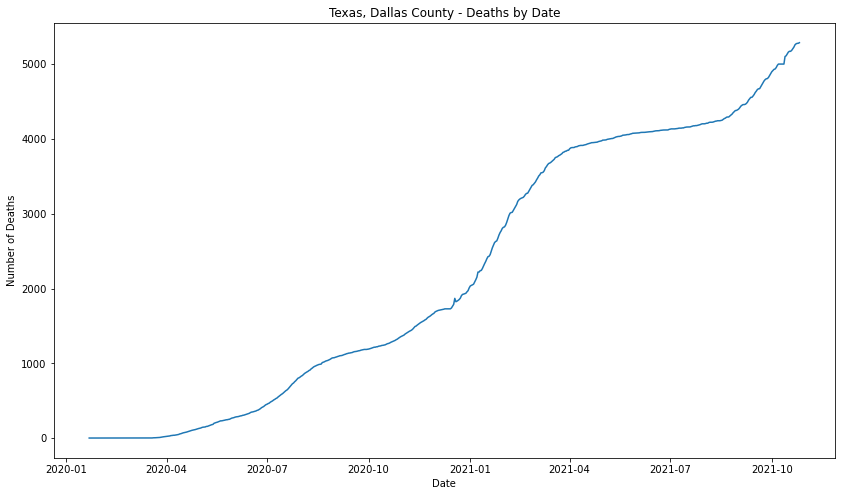

In [53]:
fig, ax = plt.subplots(figsize=(14,8))

ax.plot(df_deaths_dallas['Date'], df_deaths_dallas['Deaths'])
ax.set_title("Texas, Dallas County - Deaths by Date")
ax.set_xlabel("Date")
ax.set_ylabel("Number of Deaths")
plt.show()

##### Plot New Death per day

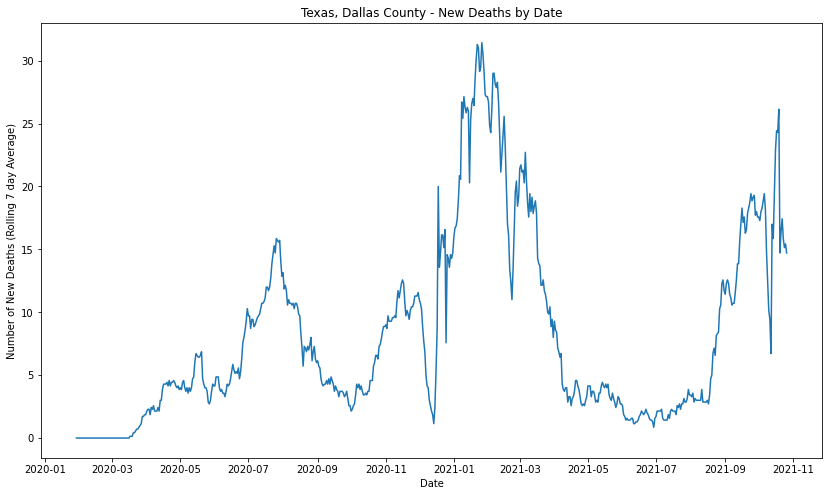

In [54]:
fig, ax = plt.subplots(figsize=(14,8))

ax.plot(df_deaths_dallas['Date'], df_deaths_dallas['New_Deaths'].rolling(window=7).mean())
ax.set_title("Texas, Dallas County - New Deaths by Date")
ax.set_xlabel("Date")
ax.set_ylabel("Number of New Deaths (Rolling 7 day Average)")
plt.show()

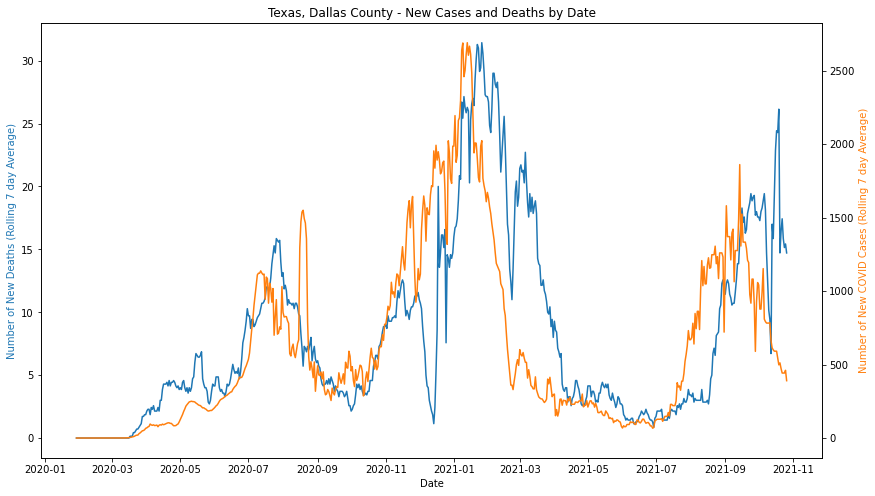

In [55]:
fig, ax = plt.subplots(figsize=(14,8))

ax.plot(df_deaths_dallas['Date'], df_deaths_dallas['New_Deaths'].rolling(window=7).mean(), color='C0')
ax.set_title("Texas, Dallas County - New Cases and Deaths by Date")
ax.set_xlabel("Date")
ax.set_ylabel("Number of New Deaths (Rolling 7 day Average)", color='C0')

ax2 = ax.twinx()
ax2.plot(dallas_case_and_mandates['Date'], dallas_case_and_mandates['Moving_Average_New_Cases'], color='C1')
ax2.set_ylabel("Number of New COVID Cases (Rolling 7 day Average)", color='C1')


plt.show()

This plot shows there is a correlation between covid cases and deaths. The plots look almost identical with lag. This plot doesn't seem to have much use though.